# Data-Preprocessing

In [ ]:
# data preprocessing 
import pandas as pd
df = pd.read_csv('../data/CAMPUS.csv')

mapping_dict = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Always': 4}

#Find column with empty values and drop them
df = df.dropna(axis=1, how='all')

df.iloc[:, :11] = df.iloc[:, :11].replace(mapping_dict)

# Convert 11th and 12th columns to N for 'No' and Y for 'Yes'
df.iloc[:, 11] = df.iloc[:, 11].replace({'No': 'N', 'Yes': 'Y'})
df.iloc[:, 12] = df.iloc[:, 12].replace({'No': 'N', 'Yes': 'Y'})

#select the 1st item to the 11th item of the header and replace them with Q1 to Q10
df.columns.values[1:13] = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 
                           'Q8', 'Q9', 'Q10', 'Depressed', 'Mental Health Issue']

# 16th item in header must be renamed to 'ID'
df.columns.values[16] = 'Other Comments'

df.to_csv('campusFinal.csv', index=False)


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('campusFinal.csv')

# Select rows where Q1 to Q10 have the same values
filtered_df = df[df.loc[:, 'Q1':'Q10'].eq(df['Q1'], axis=0).all(axis=1)]

# Display the filtered DataFrame
print(filtered_df)

# delete the rows where Q1 to Q10 have the same values
df = df.drop(filtered_df.index)

# save the new dataframe to a new csv file
df.to_csv('campusFinal.csv', index=False)


# SVM


#### Basic SVM Implementation

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Split the data into training and testing sets for Depressed column
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_depressed, test_size=0.3, random_state=42)

# Split the data into training and testing sets for Mental Health Issue column
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X, y_mental_health, test_size=0.3, random_state=42)

# Initialize the SVM classifiers
svm_classifier_dep = SVC()
svm_classifier_mental = SVC()

# Train the classifiers on the training data
svm_classifier_dep.fit(X_train_dep, y_train_dep)
svm_classifier_mental.fit(X_train_mental, y_train_mental)

# Make predictions on the test sets
y_pred_dep = svm_classifier_dep.predict(X_test_dep)
y_pred_mental = svm_classifier_mental.predict(X_test_mental)

# Evaluate the performance of the classifiers
accuracy_dep = accuracy_score(y_test_dep, y_pred_dep)
accuracy_mental = accuracy_score(y_test_mental, y_pred_mental)

classification_report_dep = classification_report(y_test_dep, y_pred_dep)
classification_report_mental = classification_report(y_test_mental, y_pred_mental)

# Display the results
print('For Depressed:')
print(f'Accuracy: {accuracy_dep:.2f}')
print('Classification Report:')
print(classification_report_dep)

print('\nFor Mental Health Issue:')
print(f'Accuracy: {accuracy_mental:.2f}')
print('Classification Report:')
print(classification_report_mental)


For Depressed:
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           N       0.71      0.56      0.63        48
           Y       0.75      0.85      0.79        73

    accuracy                           0.74       121
   macro avg       0.73      0.71      0.71       121
weighted avg       0.73      0.74      0.73       121


For Mental Health Issue:
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           N       0.75      0.65      0.69        51
           Y       0.77      0.84      0.80        70

    accuracy                           0.76       121
   macro avg       0.76      0.74      0.75       121
weighted avg       0.76      0.76      0.76       121



### SVM With 5-fold Cross Validation

In [12]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, classification_report

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Initialize the SVM classifiers
svm_classifier_dep = SVC()
svm_classifier_mental = SVC()

# Define scoring metric (accuracy)
scoring = make_scorer(accuracy_score)

# Perform 5-fold cross-validation for Depressed column
cv_scores_dep = cross_val_score(svm_classifier_dep, X, y_depressed, cv=5, scoring=scoring)
print('Cross-Validation Scores for Depressed:')
print(cv_scores_dep)
print(f'Mean Accuracy: {cv_scores_dep.mean():.2f}')

# Perform 5-fold cross-validation for Mental Health Issue column
cv_scores_mental = cross_val_score(svm_classifier_mental, X, y_mental_health, cv=5, scoring=scoring)
print('\nCross-Validation Scores for Mental Health Issue:')
print(cv_scores_mental)
print(f'Mean Accuracy: {cv_scores_mental.mean():.2f}')


Cross-Validation Scores for Depressed:
[0.64197531 0.79012346 0.7625     0.725      0.7875    ]
Mean Accuracy: 0.74

Cross-Validation Scores for Mental Health Issue:
[0.60493827 0.72839506 0.7875     0.6125     0.675     ]
Mean Accuracy: 0.68


### SVM With Tuned Parameters

In [29]:
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, classification_report


# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Best Parameters
param_grid = {'C': [1], 'kernel': ['linear'], 'gamma': ['scale']}

# Initialize the SVM classifiers with GridSearchCV
svm_classifier_dep = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5)
svm_classifier_mental = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5)

# Perform 5-fold cross-validation for Depressed column
cv_scores_dep = cross_val_score(svm_classifier_dep, X, y_depressed, cv=5, scoring='accuracy')
print('Cross-Validation Scores for Depressed:')
print(cv_scores_dep)
print(f'Mean Accuracy: {cv_scores_dep.mean():.2f}')

# Perform 5-fold cross-validation for Mental Health Issue column
cv_scores_mental = cross_val_score(svm_classifier_mental, X, y_mental_health, cv=5, scoring='accuracy')
print('\nCross-Validation Scores for Mental Health Issue:')
print(cv_scores_mental)
print(f'Mean Accuracy: {cv_scores_mental.mean():.2f}')

# print the misclassified depressed students
svm_classifier_dep.fit(X, y_depressed)
y_pred_dep = svm_classifier_dep.predict(X)
print('\nMisclassified Depressed Students:')
print(df[y_pred_dep != y_depressed])

Cross-Validation Scores for Depressed:
[0.65432099 0.82716049 0.7875     0.7375     0.7375    ]
Mean Accuracy: 0.75

Cross-Validation Scores for Mental Health Issue:
[0.62962963 0.71604938 0.825      0.5875     0.675     ]
Mean Accuracy: 0.69

Misclassified Depressed Students:
               Timestamp  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10 Depressed  \
4      9/5/2023 10:45:11   2   4   3   2   2   2   2   2   2    2         N   
7      9/5/2023 10:48:01   0   2   4   2   1   1   4   2   0    4         Y   
8      9/5/2023 10:48:04   2   2   3   3   2   2   1   1   4    3         N   
12     9/5/2023 10:49:21   3   3   4   2   3   1   0   1   3    3         N   
16     9/5/2023 10:50:22   1   0   2   1   1   2   1   1   1    1         Y   
..                   ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
388  10/16/2023 11:55:32   1   1   1   2   1   1   2   2   2    2         Y   
390  10/16/2023 12:01:40   3   3   4   4   3   0   2   2   1    2         N   
391  10/16/

### Learning Curve Plot

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


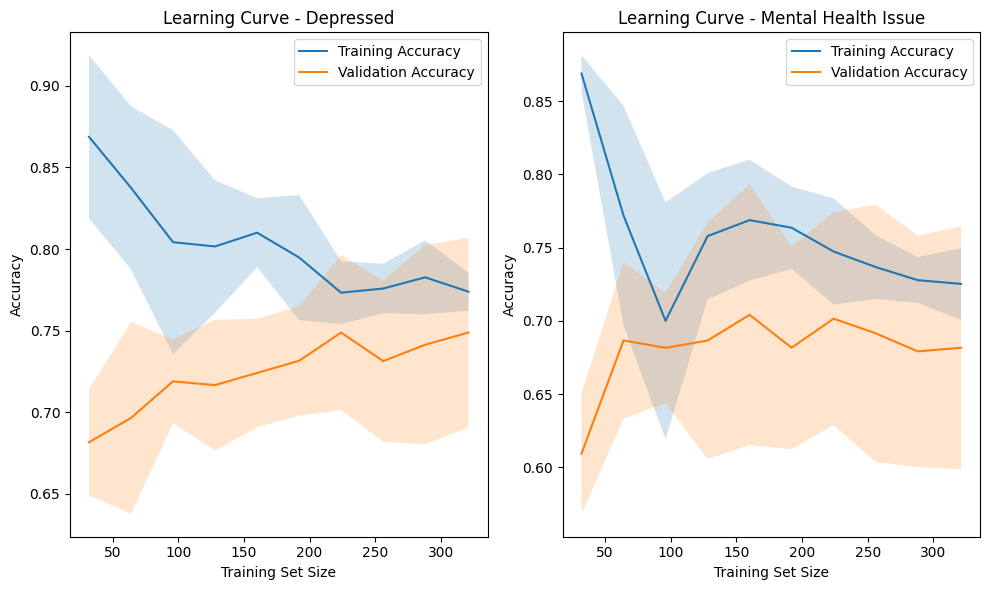

In [30]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


# Create a learning curve for Depressed column
train_sizes, train_scores_dep, test_scores_dep = learning_curve(
    svm_classifier_dep, X, y_depressed, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Create a learning curve for Mental Health Issue column
train_sizes, train_scores_mental, test_scores_mental = learning_curve(
    svm_classifier_mental, X, y_mental_health, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean_dep, train_std_dep = np.mean(train_scores_dep, axis=1), np.std(train_scores_dep, axis=1)
test_mean_dep, test_std_dep = np.mean(test_scores_dep, axis=1), np.std(test_scores_dep, axis=1)

train_mean_mental, train_std_mental = np.mean(train_scores_mental, axis=1), np.std(train_scores_mental, axis=1)
test_mean_mental, test_std_mental = np.mean(test_scores_mental, axis=1), np.std(test_scores_mental, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean_dep, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean_dep - train_std_dep, train_mean_dep + train_std_dep, alpha=0.2)
plt.plot(train_sizes, test_mean_dep, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean_dep - test_std_dep, test_mean_dep + test_std_dep, alpha=0.2)
plt.title('Learning Curve - Depressed')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_mean_mental, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean_mental - train_std_mental, train_mean_mental + train_std_mental, alpha=0.2)
plt.plot(train_sizes, test_mean_mental, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean_mental - test_std_mental, test_mean_mental + test_std_mental, alpha=0.2)
plt.title('Learning Curve - Mental Health Issue')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Naive Bayes

### Basic Naive Bayes Implementation

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Split the data into training and testing sets for Depressed column
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_depressed, test_size=0.3, random_state=42)

# Split the data into training and testing sets for Mental Health Issue column
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X, y_mental_health, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifiers
nb_classifier_dep = GaussianNB()
nb_classifier_mental = GaussianNB()

# Train the classifiers on the training data
nb_classifier_dep.fit(X_train_dep, y_train_dep)
nb_classifier_mental.fit(X_train_mental, y_train_mental)

# Make predictions on the test sets
y_pred_dep = nb_classifier_dep.predict(X_test_dep)
y_pred_mental = nb_classifier_mental.predict(X_test_mental)

# Evaluate the performance of the classifiers
accuracy_dep = accuracy_score(y_test_dep, y_pred_dep)
accuracy_mental = accuracy_score(y_test_mental, y_pred_mental)

classification_report_dep = classification_report(y_test_dep, y_pred_dep)
classification_report_mental = classification_report(y_test_mental, y_pred_mental)

# Display the results
print('For Depressed:')
print(f'Accuracy: {accuracy_dep:.2f}')
print('Classification Report:')
print(classification_report_dep)

print('\nFor Mental Health Issue:')
print(f'Accuracy: {accuracy_mental:.2f}')
print('Classification Report:')
print(classification_report_mental)


For Depressed:
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           N       0.74      0.73      0.74        48
           Y       0.82      0.84      0.83        73

    accuracy                           0.79       121
   macro avg       0.78      0.78      0.78       121
weighted avg       0.79      0.79      0.79       121


For Mental Health Issue:
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           N       0.73      0.71      0.72        51
           Y       0.79      0.81      0.80        70

    accuracy                           0.77       121
   macro avg       0.76      0.76      0.76       121
weighted avg       0.77      0.77      0.77       121



### Naive Bayes with 5-fold Cross Validation

In [15]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Initialize the Naive Bayes classifiers
nb_classifier_dep = GaussianNB()
nb_classifier_mental = GaussianNB()

# Define scoring metric (accuracy)
scoring = make_scorer(accuracy_score)

# Perform 5-fold cross-validation for Depressed column
cv_scores_dep = cross_val_score(nb_classifier_dep, X, y_depressed, cv=5, scoring=scoring)
print('Cross-Validation Scores for Depressed:')
print(cv_scores_dep)
print(f'Mean Accuracy: {cv_scores_dep.mean():.2f}')

# Perform 5-fold cross-validation for Mental Health Issue column
cv_scores_mental = cross_val_score(nb_classifier_mental, X, y_mental_health, cv=5, scoring=scoring)
print('\nCross-Validation Scores for Mental Health Issue:')
print(cv_scores_mental)
print(f'Mean Accuracy: {cv_scores_mental.mean():.2f}')


Cross-Validation Scores for Depressed:
[0.69135802 0.83950617 0.8125     0.7        0.8       ]
Mean Accuracy: 0.77

Cross-Validation Scores for Mental Health Issue:
[0.64197531 0.7654321  0.8625     0.6        0.675     ]
Mean Accuracy: 0.71


### Naive Bayes with Tuned Hyperparameters

In [16]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, classification_report

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Set up parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Initialize the Naive Bayes classifiers with GridSearchCV
nb_classifier_dep = GridSearchCV(GaussianNB(), param_grid, scoring='accuracy', cv=5)
nb_classifier_mental = GridSearchCV(GaussianNB(), param_grid, scoring='accuracy', cv=5)

# Split the data into training and testing sets for Depressed column
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_depressed, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Mental Health Issue column
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X, y_mental_health, test_size=0.2, random_state=42)

# Perform hyperparameter tuning for Depressed column
nb_classifier_dep.fit(X_train_dep, y_train_dep)
best_params_dep = nb_classifier_dep.best_params_

# Perform hyperparameter tuning for Mental Health Issue column
nb_classifier_mental.fit(X_train_mental, y_train_mental)
best_params_mental = nb_classifier_mental.best_params_

# Make predictions on the test sets
y_pred_dep = nb_classifier_dep.predict(X_test_dep)
y_pred_mental = nb_classifier_mental.predict(X_test_mental)

# Evaluate the performance of the classifiers
accuracy_dep = accuracy_score(y_test_dep, y_pred_dep)
accuracy_mental = accuracy_score(y_test_mental, y_pred_mental)

classification_report_dep = classification_report(y_test_dep, y_pred_dep)
classification_report_mental = classification_report(y_test_mental, y_pred_mental)

# Display the results
print('For Depressed:')
print(f'Accuracy: {accuracy_dep:.2f}')
print(f'Best Parameters: {best_params_dep}')
print('Classification Report:')
print(classification_report_dep)

print('\nFor Mental Health Issue:')
print(f'Accuracy: {accuracy_mental:.2f}')
print(f'Best Parameters: {best_params_mental}')
print('Classification Report:')
print(classification_report_mental)


For Depressed:
Accuracy: 0.83
Best Parameters: {'var_smoothing': 1e-09}
Classification Report:
              precision    recall  f1-score   support

           N       0.79      0.74      0.77        31
           Y       0.85      0.88      0.86        50

    accuracy                           0.83        81
   macro avg       0.82      0.81      0.81        81
weighted avg       0.83      0.83      0.83        81


For Mental Health Issue:
Accuracy: 0.74
Best Parameters: {'var_smoothing': 1e-09}
Classification Report:
              precision    recall  f1-score   support

           N       0.72      0.62      0.67        34
           Y       0.75      0.83      0.79        47

    accuracy                           0.74        81
   macro avg       0.74      0.72      0.73        81
weighted avg       0.74      0.74      0.74        81



### Naive Bayes Learning Curve

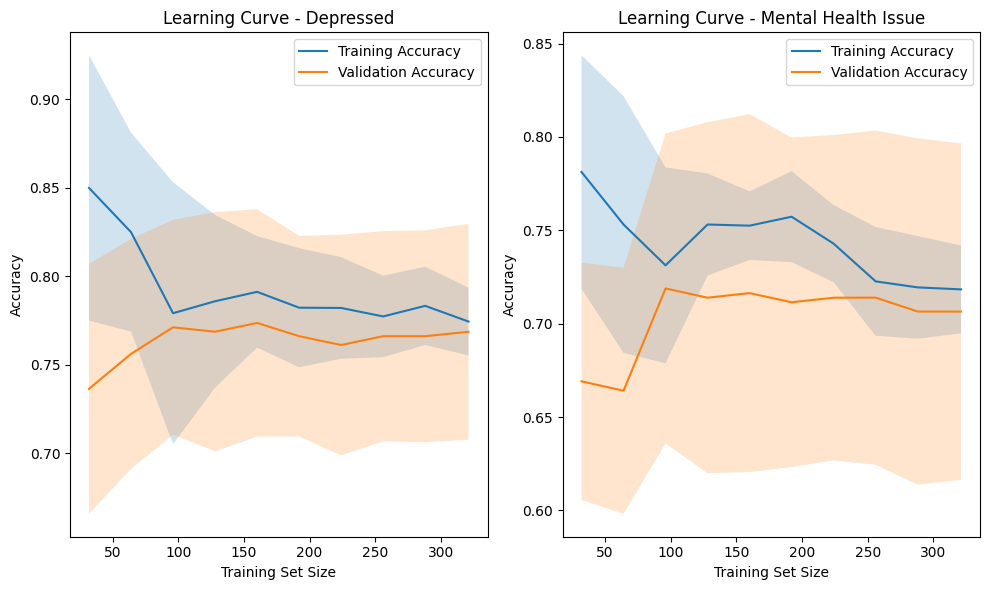

In [17]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB


# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Initialize the Naive Bayes classifiers
nb_classifier_dep = GaussianNB()
nb_classifier_mental = GaussianNB()

# Create a learning curve for Depressed column
train_sizes_dep, train_scores_dep, test_scores_dep = learning_curve(
    nb_classifier_dep, X, y_depressed, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Create a learning curve for Mental Health Issue column
train_sizes_mental, train_scores_mental, test_scores_mental = learning_curve(
    nb_classifier_mental, X, y_mental_health, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean_dep, train_std_dep = np.mean(train_scores_dep, axis=1), np.std(train_scores_dep, axis=1)
test_mean_dep, test_std_dep = np.mean(test_scores_dep, axis=1), np.std(test_scores_dep, axis=1)

train_mean_mental, train_std_mental = np.mean(train_scores_mental, axis=1), np.std(train_scores_mental, axis=1)
test_mean_mental, test_std_mental = np.mean(test_scores_mental, axis=1), np.std(test_scores_mental, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_dep, train_mean_dep, label='Training Accuracy')
plt.fill_between(train_sizes_dep, train_mean_dep - train_std_dep, train_mean_dep + train_std_dep, alpha=0.2)
plt.plot(train_sizes_dep, test_mean_dep, label='Validation Accuracy')
plt.fill_between(train_sizes_dep, test_mean_dep - test_std_dep, test_mean_dep + test_std_dep, alpha=0.2)
plt.title('Learning Curve - Depressed')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes_mental, train_mean_mental, label='Training Accuracy')
plt.fill_between(train_sizes_mental, train_mean_mental - train_std_mental, train_mean_mental + train_std_mental, alpha=0.2)
plt.plot(train_sizes_mental, test_mean_mental, label='Validation Accuracy')
plt.fill_between(train_sizes_mental, test_mean_mental - test_std_mental, test_mean_mental + test_std_mental, alpha=0.2)
plt.title('Learning Curve - Mental Health Issue')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Decision Tree

### Basic Decision Tree Implementation

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Split the data into training and testing sets for Depressed column
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_depressed, test_size=0.3, random_state=42)

# Split the data into training and testing sets for Mental Health Issue column
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X, y_mental_health, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifiers
dt_classifier_dep = DecisionTreeClassifier(random_state=42)
dt_classifier_mental = DecisionTreeClassifier(random_state=42)

# Train the classifiers on the training data
dt_classifier_dep.fit(X_train_dep, y_train_dep)
dt_classifier_mental.fit(X_train_mental, y_train_mental)

# Make predictions on the test sets
y_pred_dep = dt_classifier_dep.predict(X_test_dep)
y_pred_mental = dt_classifier_mental.predict(X_test_mental)

# Evaluate the performance of the classifiers
accuracy_dep = accuracy_score(y_test_dep, y_pred_dep)
accuracy_mental = accuracy_score(y_test_mental, y_pred_mental)

classification_report_dep = classification_report(y_test_dep, y_pred_dep)
classification_report_mental = classification_report(y_test_mental, y_pred_mental)

# Display the results
print('For Depressed:')
print(f'Accuracy: {accuracy_dep:.2f}')
print('Classification Report:')
print(classification_report_dep)

print('\nFor Mental Health Issue:')
print(f'Accuracy: {accuracy_mental:.2f}')
print('Classification Report:')
print(classification_report_mental)


For Depressed:
Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           N       0.49      0.54      0.51        48
           Y       0.68      0.63      0.65        73

    accuracy                           0.60       121
   macro avg       0.58      0.59      0.58       121
weighted avg       0.60      0.60      0.60       121


For Mental Health Issue:
Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           N       0.53      0.67      0.59        51
           Y       0.70      0.57      0.63        70

    accuracy                           0.61       121
   macro avg       0.62      0.62      0.61       121
weighted avg       0.63      0.61      0.61       121



### Naive Bayes with 5-Fold Cross Validation

In [24]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Initialize the Decision Tree classifiers
dt_classifier_dep = DecisionTreeClassifier(random_state=42)
dt_classifier_mental = DecisionTreeClassifier(random_state=42)

# Define scoring metric (accuracy)
scoring = make_scorer(accuracy_score)

# Perform 5-fold cross-validation for Depressed column
cv_scores_dep = cross_val_score(dt_classifier_dep, X, y_depressed, cv=5, scoring=scoring)
print('Cross-Validation Scores for Depressed:')
print(cv_scores_dep)
print(f'Mean Accuracy: {cv_scores_dep.mean():.2f}')


# Perform 5-fold cross-validation for Mental Health Issue column
cv_scores_mental = cross_val_score(dt_classifier_mental, X, y_mental_health, cv=5, scoring=scoring)
print('\nCross-Validation Scores for Mental Health Issue:')
print(cv_scores_mental)
print(f'Mean Accuracy: {cv_scores_mental.mean():.2f}')


Cross-Validation Scores for Depressed:
[0.58024691 0.66666667 0.6875     0.6125     0.675     ]
Mean Accuracy: 0.64

Cross-Validation Scores for Mental Health Issue:
[0.4691358  0.62962963 0.65       0.575      0.65      ]
Mean Accuracy: 0.59


### Decision Tree with Tuned HyperParameters

In [25]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Set up parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifiers with GridSearchCV
dt_classifier_dep = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
dt_classifier_mental = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)

# Split the data into training and testing sets for Depressed column
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_depressed, test_size=0.2, random_state=42)

# Split the data into training and testing sets for Mental Health Issue column
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X, y_mental_health, test_size=0.2, random_state=42)

# Perform hyperparameter tuning for Depressed column
dt_classifier_dep.fit(X_train_dep, y_train_dep)
best_params_dep = dt_classifier_dep.best_params_

# Perform hyperparameter tuning for Mental Health Issue column
dt_classifier_mental.fit(X_train_mental, y_train_mental)
best_params_mental = dt_classifier_mental.best_params_

# Make predictions on the test sets
y_pred_dep = dt_classifier_dep.predict(X_test_dep)
y_pred_mental = dt_classifier_mental.predict(X_test_mental)

# Evaluate the performance of the classifiers
accuracy_dep = accuracy_score(y_test_dep, y_pred_dep)
accuracy_mental = accuracy_score(y_test_mental, y_pred_mental)

classification_report_dep = classification_report(y_test_dep, y_pred_dep)
classification_report_mental = classification_report(y_test_mental, y_pred_mental)

# Display the results
print('For Depressed:')
print(f'Accuracy: {accuracy_dep:.2f}')
print(f'Best Parameters: {best_params_dep}')
print('Classification Report:')
print(classification_report_dep)

print('\nFor Mental Health Issue:')
print(f'Accuracy: {accuracy_mental:.2f}')
print(f'Best Parameters: {best_params_mental}')
print('Classification Report:')
print(classification_report_mental)

# Display the best parameters
print('Best Parameters for Depressed:')
print(best_params_dep)

print('\nBest Parameters for Mental Health Issue:')
print(best_params_mental)


For Depressed:
Accuracy: 0.59
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           N       0.47      0.45      0.46        31
           Y       0.67      0.68      0.67        50

    accuracy                           0.59        81
   macro avg       0.57      0.57      0.57        81
weighted avg       0.59      0.59      0.59        81


For Mental Health Issue:
Accuracy: 0.58
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           N       0.50      0.62      0.55        34
           Y       0.67      0.55      0.60        47

    accuracy                           0.58        81
   macro avg       0.58      0.59      0.58        81
weighted avg       0.60      0.58      0.58        81

Best Parameters f

### Decision Tree Learning Curve

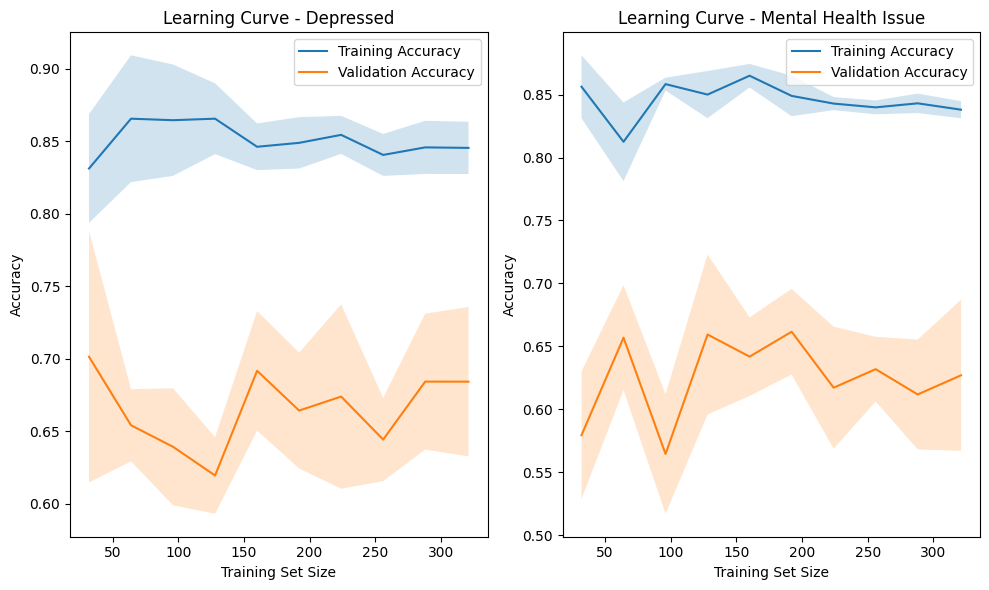

In [28]:
import pandas as pd
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Initialize the Decision Tree classifiers
dt_classifier_dep = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)
dt_classifier_mental = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=4, random_state=42)

# Create a learning curve for Depressed column
train_sizes_dep, train_scores_dep, test_scores_dep = learning_curve(
    dt_classifier_dep, X, y_depressed, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Create a learning curve for Mental Health Issue column
train_sizes_mental, train_scores_mental, test_scores_mental = learning_curve(
    dt_classifier_mental, X, y_mental_health, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean_dep, train_std_dep = np.mean(train_scores_dep, axis=1), np.std(train_scores_dep, axis=1)
test_mean_dep, test_std_dep = np.mean(test_scores_dep, axis=1), np.std(test_scores_dep, axis=1)

train_mean_mental, train_std_mental = np.mean(train_scores_mental, axis=1), np.std(train_scores_mental, axis=1)
test_mean_mental, test_std_mental = np.mean(test_scores_mental, axis=1), np.std(test_scores_mental, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_dep, train_mean_dep, label='Training Accuracy')
plt.fill_between(train_sizes_dep, train_mean_dep - train_std_dep, train_mean_dep + train_std_dep, alpha=0.2)
plt.plot(train_sizes_dep, test_mean_dep, label='Validation Accuracy')
plt.fill_between(train_sizes_dep, test_mean_dep - test_std_dep, test_mean_dep + test_std_dep, alpha=0.2)
plt.title('Learning Curve - Depressed')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes_mental, train_mean_mental, label='Training Accuracy')
plt.fill_between(train_sizes_mental, train_mean_mental - train_std_mental, train_mean_mental + train_std_mental, alpha=0.2)
plt.plot(train_sizes_mental, test_mean_mental, label='Validation Accuracy')
plt.fill_between(train_sizes_mental, test_mean_mental - test_std_mental, test_mean_mental + test_std_mental, alpha=0.2)
plt.title('Learning Curve - Mental Health Issue')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Random Forest

### Basic Random Forest Implementation

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Split the data into training and testing sets for Depressed column
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_depressed, test_size=0.3, random_state=42)

# Split the data into training and testing sets for Mental Health Issue column
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X, y_mental_health, test_size=0.3, random_state=42)

# Initialize the Random Forest classifiers
rf_classifier_dep = RandomForestClassifier(random_state=42)
rf_classifier_mental = RandomForestClassifier(random_state=42)

# Train the classifiers on the training data
rf_classifier_dep.fit(X_train_dep, y_train_dep)
rf_classifier_mental.fit(X_train_mental, y_train_mental)

# Make predictions on the test sets
y_pred_dep = rf_classifier_dep.predict(X_test_dep)
y_pred_mental = rf_classifier_mental.predict(X_test_mental)

# Evaluate the performance of the classifiers
accuracy_dep = accuracy_score(y_test_dep, y_pred_dep)
accuracy_mental = accuracy_score(y_test_mental, y_pred_mental)

classification_report_dep = classification_report(y_test_dep, y_pred_dep)
classification_report_mental = classification_report(y_test_mental, y_pred_mental)

# Display the results
print('For Depressed:')
print(f'Accuracy: {accuracy_dep:.2f}')
print('Classification Report:')
print(classification_report_dep)

print('\nFor Mental Health Issue:')
print(f'Accuracy: {accuracy_mental:.2f}')
print('Classification Report:')
print(classification_report_mental)


For Depressed:
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           N       0.65      0.54      0.59        48
           Y       0.73      0.81      0.77        73

    accuracy                           0.70       121
   macro avg       0.69      0.67      0.68       121
weighted avg       0.70      0.70      0.70       121


For Mental Health Issue:
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           N       0.65      0.71      0.68        51
           Y       0.77      0.73      0.75        70

    accuracy                           0.72       121
   macro avg       0.71      0.72      0.71       121
weighted avg       0.72      0.72      0.72       121



### Random Forest With 5-fold Cross Validation

In [31]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, classification_report


# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Initialize the Random Forest classifiers
rf_classifier_dep = RandomForestClassifier(random_state=42)
rf_classifier_mental = RandomForestClassifier(random_state=42)

# Define scoring metric (accuracy)
scoring = make_scorer(accuracy_score)

# Perform 5-fold cross-validation for Depressed column
cv_scores_dep = cross_val_score(rf_classifier_dep, X, y_depressed, cv=5, scoring=scoring)
print('Cross-Validation Scores for Depressed:')
print(cv_scores_dep)
print(f'Mean Accuracy: {cv_scores_dep.mean():.2f}')

# Perform 5-fold cross-validation for Mental Health Issue column
cv_scores_mental = cross_val_score(rf_classifier_mental, X, y_mental_health, cv=5, scoring=scoring)
print('\nCross-Validation Scores for Mental Health Issue:')
print(cv_scores_mental)
print(f'Mean Accuracy: {cv_scores_mental.mean():.2f}')


Cross-Validation Scores for Depressed:
[0.60493827 0.75308642 0.7375     0.6625     0.75      ]
Mean Accuracy: 0.70

Cross-Validation Scores for Mental Health Issue:
[0.58024691 0.71604938 0.725      0.5875     0.6625    ]
Mean Accuracy: 0.65


### Random forest with Tuned Hyperparameters

In [35]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv('campusFinal.csv')

# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Set up parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'max_features': ['sqrt']
}

# Initialize the Random Forest classifiers with GridSearchCV
rf_classifier_dep = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)
rf_classifier_mental = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=5)

# Split the data into training and testing sets for Depressed column
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_depressed, test_size=0.3, random_state=42)

# Split the data into training and testing sets for Mental Health Issue column
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X, y_mental_health, test_size=0.3, random_state=42)

# Perform hyperparameter tuning for Depressed column
rf_classifier_dep.fit(X_train_dep, y_train_dep)
best_params_dep = rf_classifier_dep.best_params_

# Perform hyperparameter tuning for Mental Health Issue column
rf_classifier_mental.fit(X_train_mental, y_train_mental)
best_params_mental = rf_classifier_mental.best_params_

# Make predictions on the test sets
y_pred_dep = rf_classifier_dep.predict(X_test_dep)
y_pred_mental = rf_classifier_mental.predict(X_test_mental)

# Evaluate the performance of the classifiers
accuracy_dep = accuracy_score(y_test_dep, y_pred_dep)
accuracy_mental = accuracy_score(y_test_mental, y_pred_mental)

classification_report_dep = classification_report(y_test_dep, y_pred_dep)
classification_report_mental = classification_report(y_test_mental, y_pred_mental)

# Display the results
print('For Depressed:')
print(f'Accuracy: {accuracy_dep:.2f}')
print(f'Best Parameters: {best_params_dep}')
print('Classification Report:')
print(classification_report_dep)

print('\nFor Mental Health Issue:')
print(f'Accuracy: {accuracy_mental:.2f}')
print(f'Best Parameters: {best_params_mental}')
print('Classification Report:')
print(classification_report_mental)



For Depressed:
Accuracy: 0.74
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           N       0.71      0.56      0.63        48
           Y       0.75      0.85      0.79        73

    accuracy                           0.74       121
   macro avg       0.73      0.71      0.71       121
weighted avg       0.73      0.74      0.73       121


For Mental Health Issue:
Accuracy: 0.75
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           N       0.71      0.69      0.70        51
           Y       0.78      0.80      0.79        70

    accuracy                           0.75       121
   macro avg       0.75      0.74      0.74       121
weighted avg       0.75      0

### Learning Curve

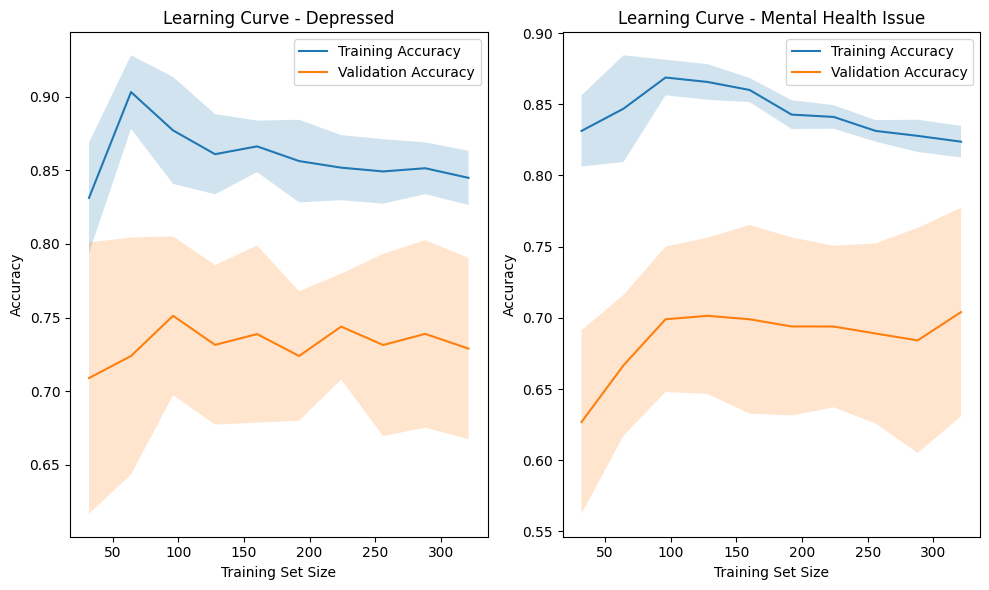

In [37]:
import pandas as pd
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier


# Select features (Q1 to Q10) and target variables
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']]
y_depressed = df['Depressed']
y_mental_health = df['Mental Health Issue']

# Initialize the Random Forest classifiers
rf_classifier_dep = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', random_state=42)
rf_classifier_mental = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', random_state=42)

# Create a learning curve for Depressed column
train_sizes_dep, train_scores_dep, test_scores_dep = learning_curve(
    rf_classifier_dep, X, y_depressed, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Create a learning curve for Mental Health Issue column
train_sizes_mental, train_scores_mental, test_scores_mental = learning_curve(
    rf_classifier_mental, X, y_mental_health, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_mean_dep, train_std_dep = np.mean(train_scores_dep, axis=1), np.std(train_scores_dep, axis=1)
test_mean_dep, test_std_dep = np.mean(test_scores_dep, axis=1), np.std(test_scores_dep, axis=1)

train_mean_mental, train_std_mental = np.mean(train_scores_mental, axis=1), np.std(train_scores_mental, axis=1)
test_mean_mental, test_std_mental = np.mean(test_scores_mental, axis=1), np.std(test_scores_mental, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_dep, train_mean_dep, label='Training Accuracy')
plt.fill_between(train_sizes_dep, train_mean_dep - train_std_dep, train_mean_dep + train_std_dep, alpha=0.2)
plt.plot(train_sizes_dep, test_mean_dep, label='Validation Accuracy')
plt.fill_between(train_sizes_dep, test_mean_dep - test_std_dep, test_mean_dep + test_std_dep, alpha=0.2)
plt.title('Learning Curve - Depressed')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes_mental, train_mean_mental, label='Training Accuracy')
plt.fill_between(train_sizes_mental, train_mean_mental - train_std_mental, train_mean_mental + train_std_mental, alpha=0.2)
plt.plot(train_sizes_mental, test_mean_mental, label='Validation Accuracy')
plt.fill_between(train_sizes_mental, test_mean_mental - test_std_mental, test_mean_mental + test_std_mental, alpha=0.2)
plt.title('Learning Curve - Mental Health Issue')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
